**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
ortho_df=pd.read_csv('2Classdata.csv')

In [3]:
ortho_df.shape

(310, 7)

In [4]:
# datatype information
ortho_df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [5]:
ortho_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
ortho_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [7]:
# Missing Values
ortho_df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [8]:
# Unique values of class attribute
ortho_df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


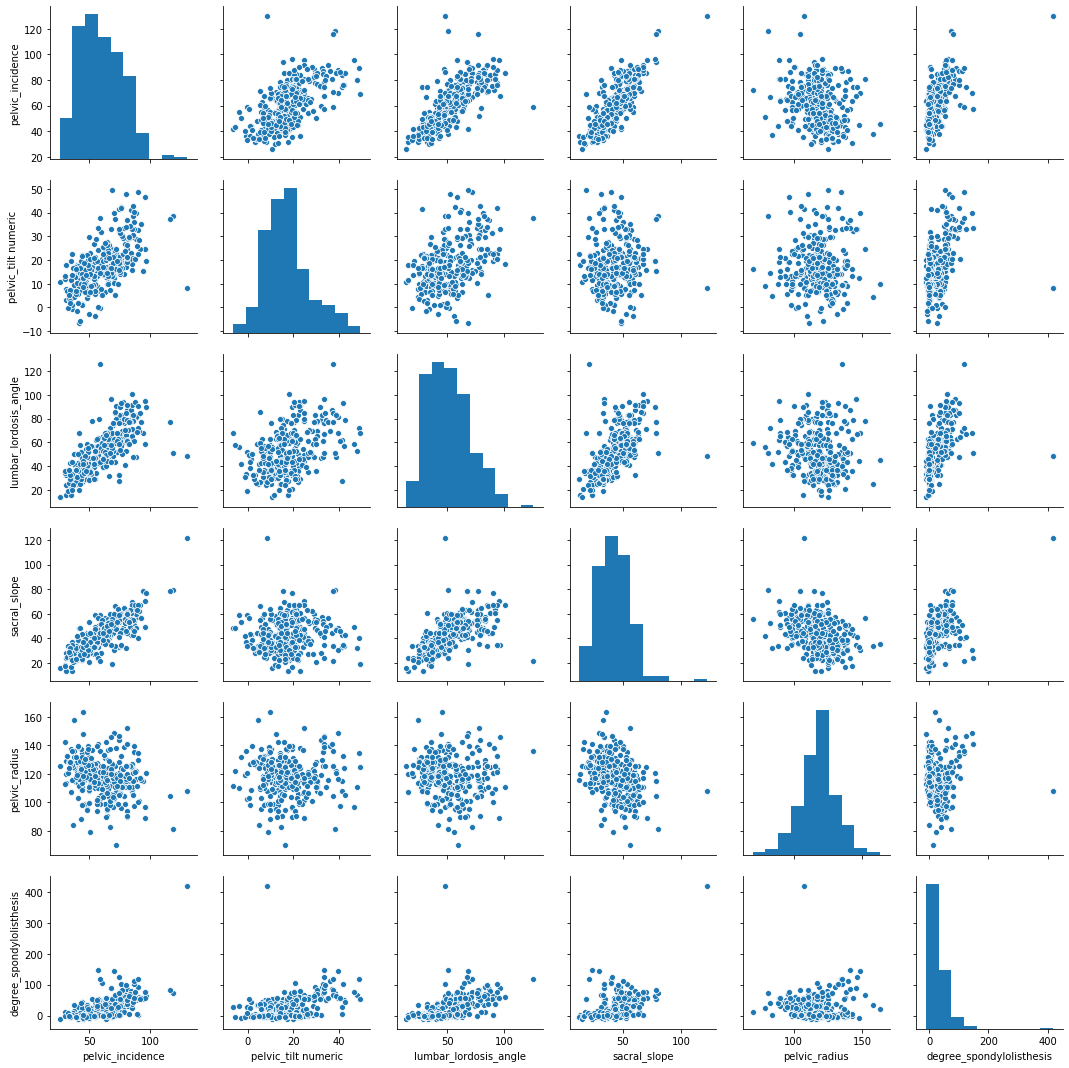

In [9]:
# Distribution of class and other values
sns.pairplot(ortho_df)

Distribution is normal for pelvic_radius and near normal for pelvic_tilt_numeric

All other atttributes except Degree_spondyloslisthesis is skedwed with outliers

In [22]:
ortho_df=ortho_df.astype({'class':'category'})

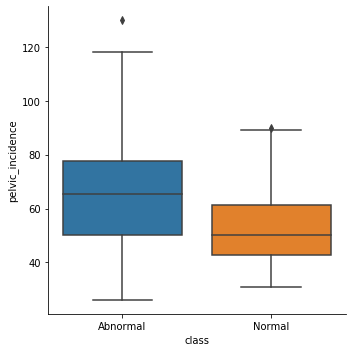

In [30]:
sns.catplot(x="class",y="pelvic_incidence",kind="box",data=ortho_df)

In [28]:
ortho_df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


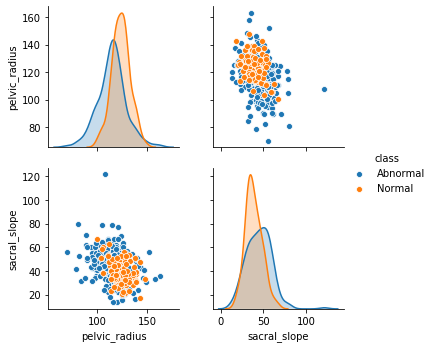

In [42]:
ortho_df1=ortho_df[['pelvic_radius','sacral_slope','class']]
sns.pairplot(ortho_df1,hue='class')


pelvic_radius is having normal distribution for class values of normal and abnormal

sacral_slope is having normal distribution for class values with normal while abnormal has outliers and is having larger spread


# Encode the Class variable to integer.

In [31]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le1=le.fit_transform(ortho_df['class'])
ortho_df['class']=le1
ortho_df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [32]:
ortho_df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [33]:
ortho_feature_df = ortho_df.drop(labels= "class" , axis = 1)
ortho_feature_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [92]:
X = np.array(ortho_feature_df)
#X.shape
Y = ortho_df["class"].values
#Y.shape

In [93]:
X

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

# Normalize your Data (X) to get values between 0 to 1.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,stratify=Y)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [99]:
NNH = KNeighborsClassifier(n_neighbors= 5)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
y_predict = NNH.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [101]:
NNH.score(X_test, y_test)

0.8172043010752689

In [102]:
accuracy_score(y_test,y_predict)

0.8172043010752689

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [103]:
cv_scores = []
neighbors = list(np.arange(3,50,2))

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    score=knn.score(X_test,y_test)
    cv_scores.append(score)
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n)
knn_optimal.fit(X_train,y_train)
acc=knn_optimal.score(X_test,y_test)*100
print("The accuracy for optimal k = {0} using knn score is {1}".format(optimal_n,acc))

pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using accuracy score is {1}".format(optimal_n,acc))


The accuracy for optimal k = 17 using knn score is 88.17204301075269
The accuracy for optimal k = 17 using accuracy score is 88.17204301075269


In [106]:
cv_scores

[0.7741935483870968,
 0.8172043010752689,
 0.8494623655913979,
 0.8709677419354839,
 0.8602150537634409,
 0.8602150537634409,
 0.8709677419354839,
 0.8817204301075269,
 0.8709677419354839,
 0.8494623655913979,
 0.8602150537634409,
 0.8602150537634409,
 0.8602150537634409,
 0.8817204301075269,
 0.8817204301075269,
 0.8709677419354839,
 0.8494623655913979,
 0.8494623655913979,
 0.8279569892473119,
 0.8172043010752689,
 0.8279569892473119,
 0.8172043010752689,
 0.8279569892473119,
 0.8494623655913979]

All k values are having almost same score. Hence ideal k value can be considered default value of 5

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [61]:
df=pd.read_csv('3Classdata.csv')

In [62]:
df.shape

(310, 7)

In [63]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [64]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [65]:
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [66]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [67]:
df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


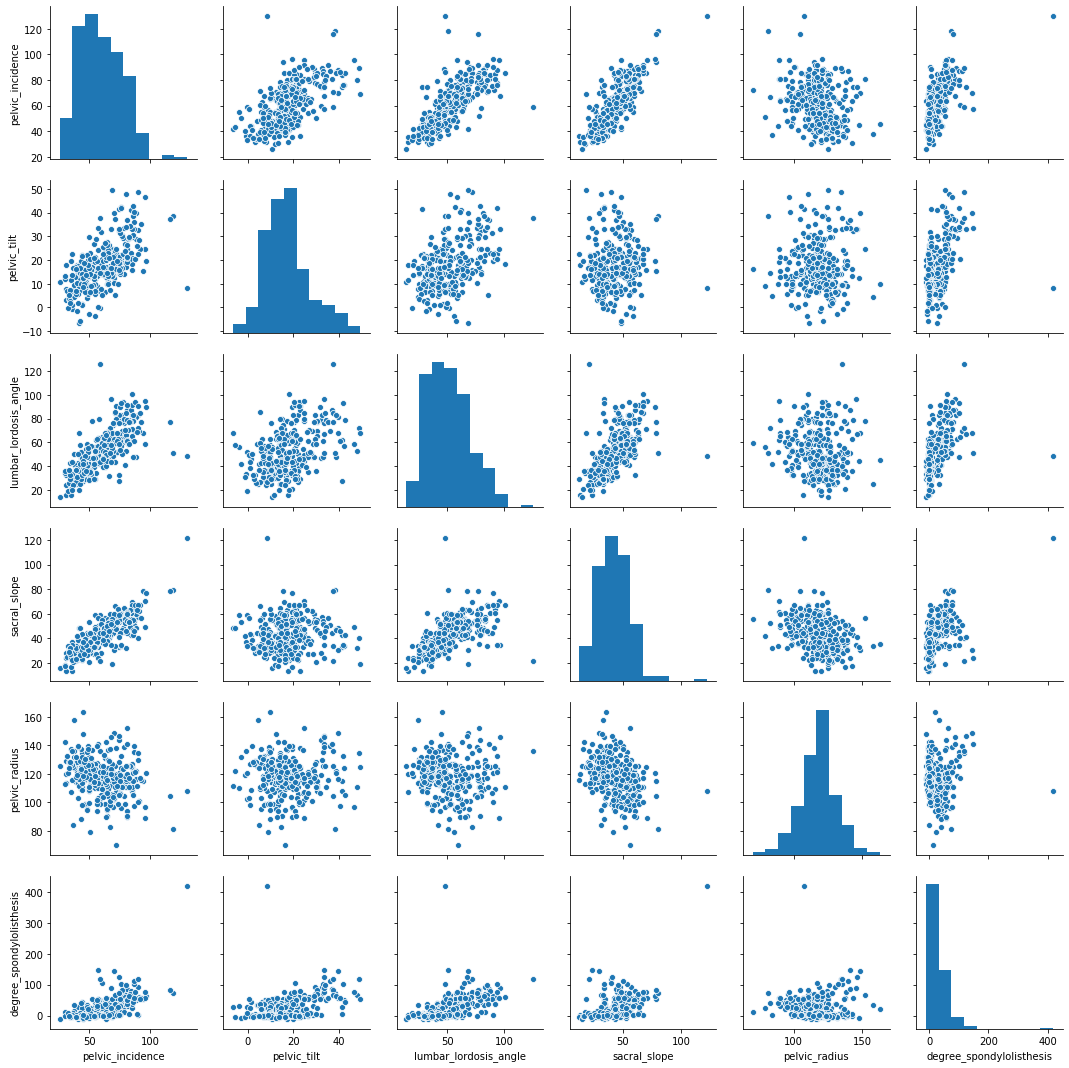

In [68]:
sns.pairplot(df)

In [71]:
df=df.astype({'class':'category'})

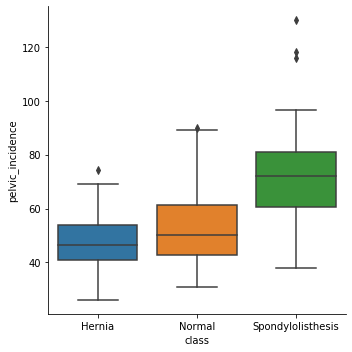

In [72]:
sns.catplot(x="class",y="pelvic_incidence",kind="box",data=df)

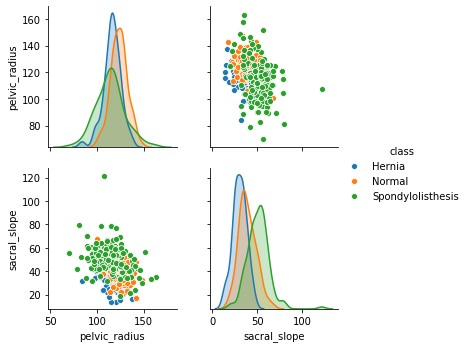

In [73]:
df1=df[['pelvic_radius','sacral_slope','class']]
sns.pairplot(df1,hue='class')

In [74]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le1=le.fit_transform(df['class'])
df['class']=le1
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [76]:
df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,60,60,60,60,60,60
1,100,100,100,100,100,100
2,150,150,150,150,150,150


In [77]:
X=df.drop(['class'],axis=1)
Y=df.iloc[:,-1]

In [78]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,stratify=Y)

In [91]:
cv_scores = []
neighbors = list(np.arange(3,50,2))

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    score=knn.score(X_test,y_test)
    cv_scores.append(score)
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n)
knn_optimal.fit(X_train,y_train)
acc=knn_optimal.score(X_test,y_test)*100
print("The accuracy for optimal k = {0} using knn score is {1}".format(optimal_n,acc))

pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using accuracy score is {1}".format(optimal_n,acc))


The accuracy for optimal k = 11 using knn score is 76.34408602150538
The accuracy for optimal k = 11 using accuracy score is 76.34408602150538


In [ ]:
# using cross_val_score function
cv_scores = []
neighbors = list(np.arange(3,50,2))

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    cross_val = cross_val_score(knn,X_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n)
knn_optimal.fit(X_train,y_train)
acc=knn_optimal.score(X_test,y_test)*100
print("The accuracy for optimal k = {0} is {1}".format(optimal_n,acc))

pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} is {1}".format(optimal_n,acc))